### MA CROSSOVER

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf
import datetime as dt
import mplfinance as mpf

In [2]:
date_end,time_end = str(dt.datetime.now()).split()
date_start,time_start = str(dt.datetime.now() - dt.timedelta(days=365)).split()
ticker = "ASTRAL.NS"
df_main = yf.download(ticker,date_start,date_end)

[*********************100%***********************]  1 of 1 completed


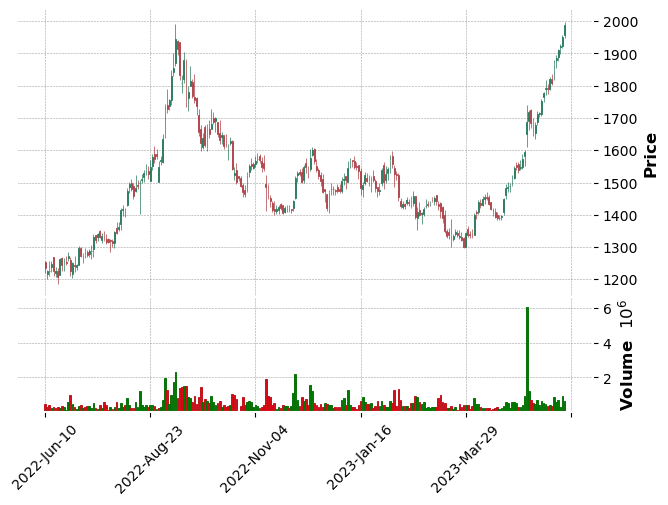

In [3]:
mpf.plot(df_main,type='candle',style='charles',volume=True)

### Moving Average Crossover Stratergy

In [4]:
df_ma = df_main.copy()

In [5]:
df_ma['50EMA'] = df_ma.Close.ewm(span=50,adjust=False).mean().round(2)
df_ma['200EMA'] = df_ma.Close.ewm(span=200,adjust=False).mean().round(2)

In [6]:
df_ma.head()

,Open,High,Low,Close,Adj Close,Volume,50EMA,200EMA
Date,,,,,,,,
2022-06-10,1252.500000,1256.625000,1220.625000,1235.962524,1234.083740,469815,1235.96,1235.96
2022-06-13,1216.500000,1229.662476,1201.162476,1226.925049,1225.060059,312870,1235.61,1235.87
2022-06-14,1227.150024,1255.875000,1211.250000,1225.762451,1223.899292,399882,1235.22,1235.77
2022-06-15,1237.500000,1257.375000,1223.324951,1247.175049,1245.279297,222866,1235.69,1235.89
2022-06-16,1270.500000,1270.500000,1211.324951,1225.650024,1223.786987,273626,1235.30,1235.78


In [7]:
plots = [mpf.make_addplot(df_ma['50EMA'],color='black'),mpf.make_addplot(df_ma['200EMA'],color='blue')]

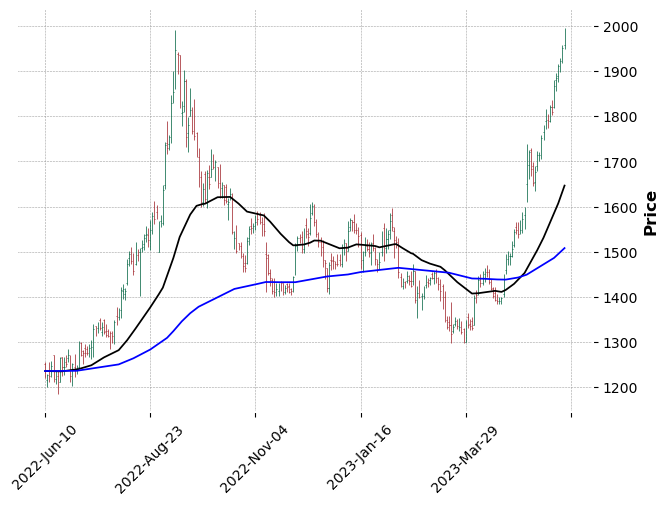

In [8]:
mpf.plot(df_ma,addplot=plots,style='charles')

In [11]:
short_window = 50
long_window = 200

# Compute the EMAs
df_ma['EMA_short'] = df_ma['Close'].ewm(span=short_window, adjust=False).mean()
df_ma['EMA_long'] = df_ma['Close'].ewm(span=long_window, adjust=False).mean()


In [12]:
df_ma.head()

,Open,High,Low,Close,Adj Close,Volume,50EMA,200EMA,EMA_short,EMA_long
Date,,,,,,,,,,
2022-06-10,1252.500000,1256.625000,1220.625000,1235.962524,1234.083740,469815,1235.96,1235.96,1235.962524,1235.962524
2022-06-13,1216.500000,1229.662476,1201.162476,1226.925049,1225.060059,312870,1235.61,1235.87,1235.608114,1235.872599
2022-06-14,1227.150024,1255.875000,1211.250000,1225.762451,1223.899292,399882,1235.22,1235.77,1235.222009,1235.772001
2022-06-15,1237.500000,1257.375000,1223.324951,1247.175049,1245.279297,222866,1235.69,1235.89,1235.690756,1235.885464
2022-06-16,1270.500000,1270.500000,1211.324951,1225.650024,1223.786987,273626,1235.30,1235.78,1235.297002,1235.783619


In [14]:
df_ma['Signal'] = np.where(df_ma['EMA_short'] > df_ma['EMA_long'], 1, -1)
df_ma['Position'] = df_ma['Signal'].diff()


In [15]:
df_ma

,Open,High,Low,Close,Adj Close,Volume,50EMA,200EMA,EMA_short,EMA_long,Signal,Position
Date,,,,,,,,,,,,
2022-06-10,1252.500000,1256.625000,1220.625000,1235.962524,1234.083740,469815,1235.96,1235.96,1235.962524,1235.962524,-1,NaN
2022-06-13,1216.500000,1229.662476,1201.162476,1226.925049,1225.060059,312870,1235.61,1235.87,1235.608114,1235.872599,-1,0.0
2022-06-14,1227.150024,1255.875000,1211.250000,1225.762451,1223.899292,399882,1235.22,1235.77,1235.222009,1235.772001,-1,0.0
2022-06-15,1237.500000,1257.375000,1223.324951,1247.175049,1245.279297,222866,1235.69,1235.89,1235.690756,1235.885464,-1,0.0
2022-06-16,1270.500000,1270.500000,1211.324951,1225.650024,1223.786987,273626,1235.30,1235.78,1235.297002,1235.783619,-1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-05,1880.000000,1894.900024,1855.000000,1884.849976,1884.849976,612285,1594.79,1490.36,1594.793978,1490.356149,1,0.0
2023-06-06,1889.949951,1914.900024,1876.000000,1910.449951,1910.449951,685189,1607.17,1494.54,1607.172644,1494.536187,1,0.0
2023-06-07,1919.349976,1930.000000,1899.050049,1923.300049,1923.300049,297211,1619.57,1498.80,1619.569797,1498.802494,1,0.0


In [19]:
initial_capital = 1
df_ma['Returns'] = df_ma['Close'].pct_change() * df_ma['Position'].shift(1)
target = 0.20  # 20% target
stop_loss = df_ma['EMA_short']  # Stop loss at the nearest EMA on the downside
# Apply the target and stop loss conditions to adjust the position
df_ma['Position'] = np.where(df_ma['Position'] == 1, np.where(df_ma['Close'] >= (1 + target) * df_ma['Close'].shift(1), 0,
                                                      np.where(df_ma['Close'] <= stop_loss, -1, 1)),
                          np.where(df_ma['Position'] == -1, np.where(df_ma['Close'] <= (1 - target) * df_ma['Close'].shift(1), 0,
                                                                 np.where(df_ma['Close'] >= stop_loss, 1, -1)),
                                   0))
df_ma['Cumulative Returns'] = (1 + df_ma['Returns']).cumprod()
df_ma['Portfolio Value'] = df_ma['Cumulative Returns'] * initial_capital


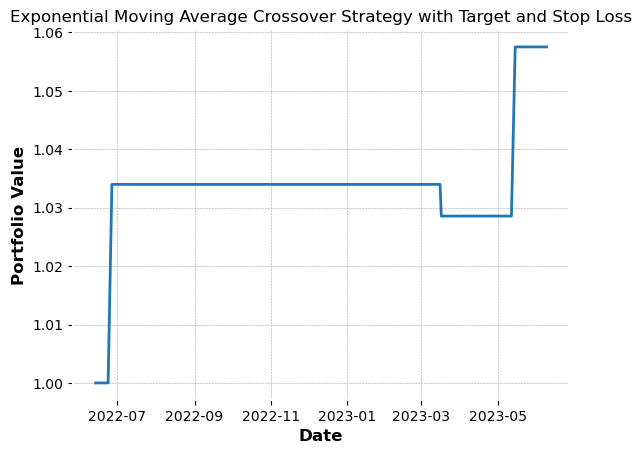

In [27]:
plt.plot(df_ma['Date'], df_ma['Portfolio Value'])
plt.title('Exponential Moving Average Crossover Strategy with Target and Stop Loss')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.show()